# Assignment 3: KNN, Logistic Regression, SVM, and Ensemble Methods

## Dataset
Use a publicly available dataset (Breast Cancer dataset)
The Breast Cancer dataset from scikit-learn will be used in this notebook.
split the dataset into training and testing sets.

In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check the dataset shape
print("Dataset shape: ")
print(df.shape)

# get target names
print("\n\nTarget names: ")
print(data.target_names)

# View dataset info
print("\n\nDataset info: ")
print(df.info())


# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n\nTraining samples: {X_train.shape[0]}")
print(f"\n\nTesting samples: {X_test.shape[0]}")

Dataset shape: 
(569, 31)


Target names: 
['malignant' 'benign']


Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 1

# Data Visualization



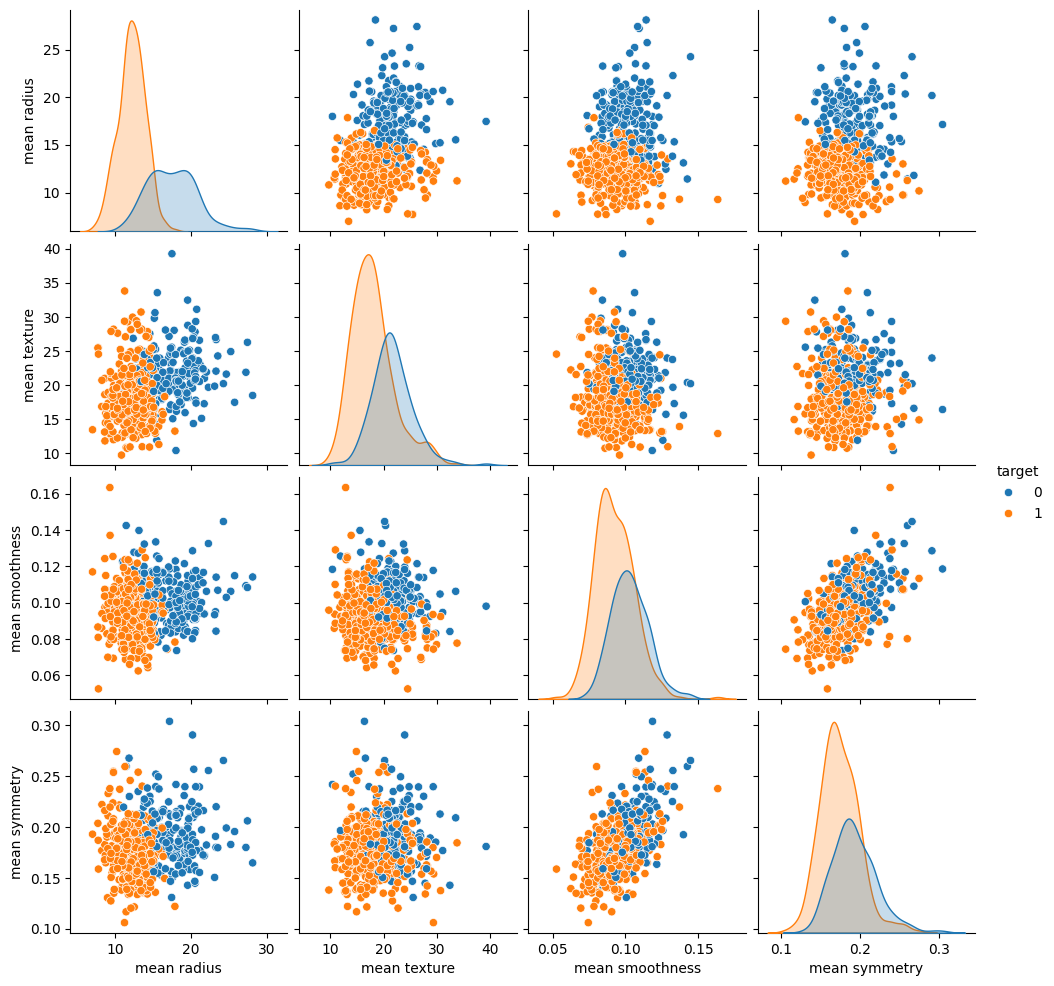

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']
sns.pairplot(df[selected_features + ['target']], hue='target', diag_kind='kde')
plt.show()


# K-Nearest Neighbors (KNN)



### Results Summary ###

Metric: euclidean
  Best K: 9
  Cross-Validation Accuracy: 0.9275
  Test Accuracy: 0.9561
  Precision: 0.9459
  Recall: 0.9859
  F1-Score: 0.9655
  ROC-AUC: 0.9956

Metric: manhattan
  Best K: 6
  Cross-Validation Accuracy: 0.9407
  Test Accuracy: 0.9561
  Precision: 0.9459
  Recall: 0.9859
  F1-Score: 0.9655
  ROC-AUC: 0.9964

Metric: cosine
  Best K: 11
  Cross-Validation Accuracy: 0.9209
  Test Accuracy: 0.9474
  Precision: 0.9333
  Recall: 0.9859
  F1-Score: 0.9589
  ROC-AUC: 0.9843


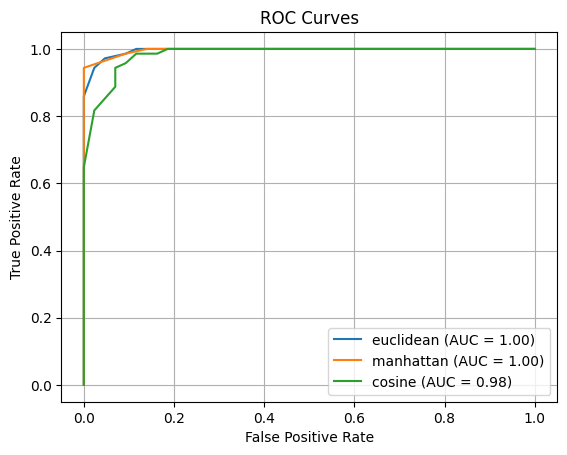

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Results dictionary
knn_results = {}

# Experiment with different distance metrics
for metric in distance_metrics:
    knn = KNeighborsClassifier(metric=metric)
    
    # Perform cross-validation for different K values
    best_k = 1
    best_accuracy = 0
    for k in range(1, 41):  # Test K values from 1 to 30
        knn.n_neighbors = k
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_cv_score = np.mean(cv_scores)
        
        if mean_cv_score > best_accuracy:
            best_k = k
            best_accuracy = mean_cv_score
    
    # Train and evaluate the best KNN model
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_best.fit(X_train, y_train)
    y_pred = knn_best.predict(X_test)
    y_proba = knn_best.predict_proba(X_test)[:, 1]  # For ROC-AUC
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    knn_results[metric] = {
        'best_k': best_k,
        'cv_accuracy': best_accuracy,
        'test_accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{metric} (AUC = {roc_auc:.2f})')

# Results Summary
print("\n\n### Results Summary ###")
for metric, result in knn_results.items():
    print(f"\nMetric: {metric}")
    print(f"  Best K: {result['best_k']}")
    print(f"  Cross-Validation Accuracy: {result['cv_accuracy']:.4f}")
    print(f"  Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-Score: {result['f1']:.4f}")
    print(f"  ROC-AUC: {result['roc_auc']:.4f}")
    

# Plot ROC Curves for all metrics
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Logistic Regression



### Logistic Regression Results Summary ###

Regularization: L1
  Accuracy: 0.9561
  Precision: 0.9459
  Recall: 0.9859
  F1-Score: 0.9655
  ROC-AUC: 0.9977

Regularization: L2
  Accuracy: 0.9561
  Precision: 0.9459
  Recall: 0.9859
  F1-Score: 0.9655
  ROC-AUC: 0.9977


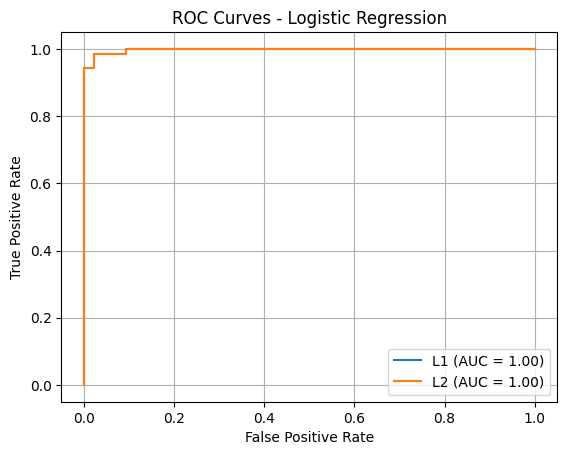

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store results for L1 and L2 regularization
logistic_results = {}

# Experiment with L1 and L2 regularization
for penalty in ['l1', 'l2']:
    # Logistic Regression Model
    solver = 'liblinear'   # Choose appropriate solver
    model = LogisticRegression(penalty=penalty, solver=solver, max_iter=1000, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    logistic_results[penalty] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{penalty.upper()} (AUC = {roc_auc:.2f})')


# Results Summary
print("\n\n### Logistic Regression Results Summary ###")
for penalty, result in logistic_results.items():
    print(f"\nRegularization: {penalty.upper()}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-Score: {result['f1']:.4f}")
    print(f"  ROC-AUC: {result['roc_auc']:.4f}")

# Plot ROC Curves for both regularization techniques
plt.title('ROC Curves - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Support Vector Machine (SVM)



### SVM Results Summary ###

Kernel: LINEAR
  Accuracy: 0.9561
  Precision: 0.9459
  Recall: 0.9859
  F1-Score: 0.9655
  ROC-AUC: 0.9957

Kernel: POLY
  Accuracy: 0.9474
  Precision: 0.9221
  Recall: 1.0000
  F1-Score: 0.9595
  ROC-AUC: 0.9915

Kernel: RBF
  Accuracy: 0.9474
  Precision: 0.9221
  Recall: 1.0000
  F1-Score: 0.9595
  ROC-AUC: 0.9934


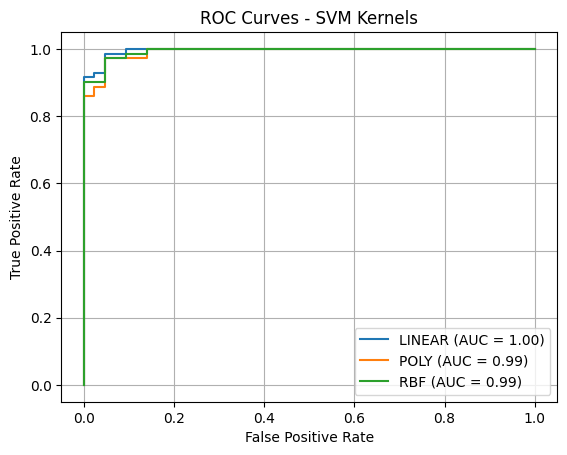

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store results for different kernels
svm_results = {}

# Experiment with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels: 
    # SVM Model
    model = SVC(kernel=kernel, probability=True, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    svm_results[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{kernel.upper()} (AUC = {roc_auc:.2f})')

# Results Summary
print("\n\n### SVM Results Summary ###")
for kernel, result in svm_results.items():
    print(f"\nKernel: {kernel.upper()}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  F1-Score: {result['f1']:.4f}")
    print(f"  ROC-AUC: {result['roc_auc']:.4f}")
    
# Plot ROC Curves for all kernels
plt.title('ROC Curves - SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show() 

# Ensemble Methods



### Ensemble Methods Results Summary ###

AdaBoost:
  Accuracy: 0.9737
  Precision: 0.9722
  Recall: 0.9859
  F1: 0.9790
  Roc_auc: 0.9944

Random Forest:
  Accuracy: 0.9649
  Precision: 0.9589
  Recall: 0.9859
  F1: 0.9722
  Roc_auc: 0.9953


### Discussion ###
AdaBoost performed better based on accuracy. This could be due to its focus on misclassified samples.
Random Forest achieved a better ROC-AUC score, indicating it may handle this dataset's complexity more effectively.


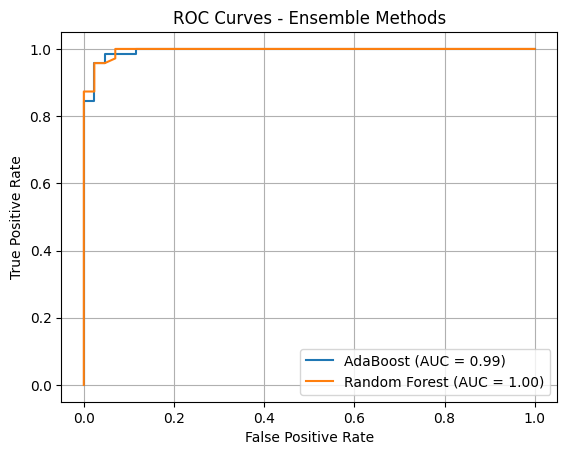

In [102]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary to store results for AdaBoost and Random Forest
ensemble_results = {}

# Step 1: Train AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Predictions and probabilities
y_pred_adaboost = adaboost.predict(X_test)
y_proba_adaboost = adaboost.predict_proba(X_test)[:, 1]

# Evaluate AdaBoost
adaboost_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_adaboost),
    'precision': precision_score(y_test, y_pred_adaboost),
    'recall': recall_score(y_test, y_pred_adaboost),
    'f1': f1_score(y_test, y_pred_adaboost),
    'roc_auc': roc_auc_score(y_test, y_proba_adaboost)
}

# Plot ROC Curve for AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)
plt.plot(fpr_adaboost, tpr_adaboost, label=f"AdaBoost (AUC = {adaboost_metrics['roc_auc']:.2f})")

# Store AdaBoost results
ensemble_results['AdaBoost'] = adaboost_metrics


# Step 2: Train Random Forest (Bagging)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions and probabilities
y_pred_rf = random_forest.predict(X_test)
y_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
rf_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf)
}

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_metrics['roc_auc']:.2f})")

# Store Random Forest results
ensemble_results['Random Forest'] = rf_metrics




print("\n\n### Ensemble Methods Results Summary ###")
for method, metrics in ensemble_results.items():
    print(f"\n{method}:")
    for metric, value in metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
        
print("\n\n### Discussion ###")
if adaboost_metrics['accuracy'] > rf_metrics['accuracy']:
    print("AdaBoost performed better based on accuracy. This could be due to its focus on misclassified samples.")
else:
    print("Random Forest performed better based on accuracy. This could be due to its robustness and low variance.")
    
if adaboost_metrics['roc_auc'] > rf_metrics['roc_auc']:
    print("AdaBoost achieved a better ROC-AUC score, suggesting it distinguishes classes more effectively.")
else:
    print("Random Forest achieved a better ROC-AUC score, indicating it may handle this dataset's complexity more effectively.")

        
plt.title('ROC Curves - Ensemble Methods')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()